# Espectogramas

Cargamos las primeras cosas

In [12]:
%matplotlib inline

import pylab
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
import matplotlib.pyplot as pyplot
import random
import numpy as np
import sounddevice as sd
from myaudiolib import onda, guardar, cuadrada, triang, mysin, reproducir



# # Mostramos su espectrograma.
# import pylab
# pyplot.clf()
# sgram = pylab.specgram(mionda, Fs=16000.0)
# pyplot.savefig('espectrograma.png')

def spectrum(wave):
    _, _, _, axes = pyplot.specgram(wave, Fs=sd.default.samplerate)
    pyplot.ylim([0, 5000])




Hagamos un espectograma de ruido blanco

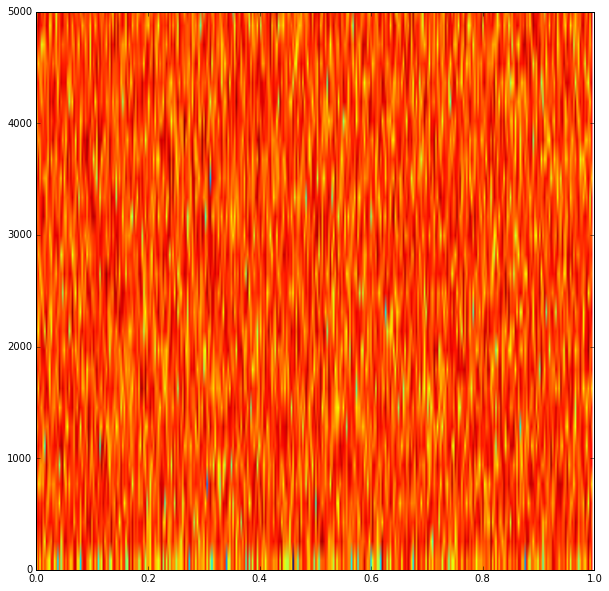

In [13]:
# La frecuencia no importa acá...
ruido_blanco = onda(1,fun=lambda t: random.uniform(-1, 1))

spectrum(ruido_blanco)

2. Crear una senoidal simple y combinarla con ruido blanco. Mostrar su espectograma.

Primero, espectograma de la nota "la"

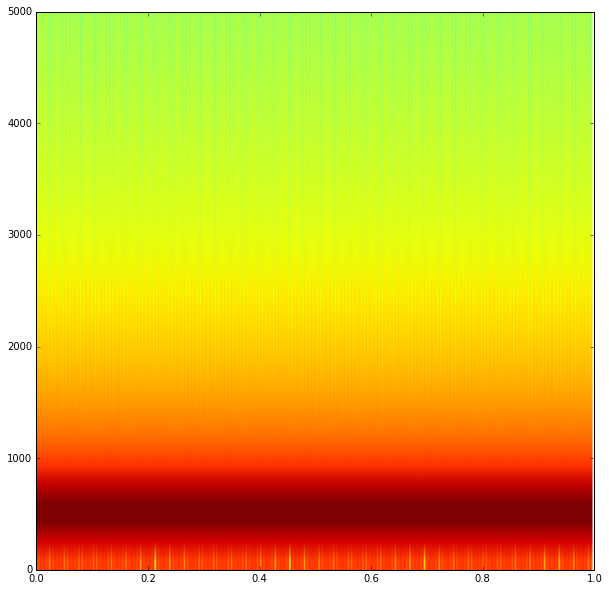

In [14]:
la = onda(440)

spectrum(la)

Ahora con ruido blanco!

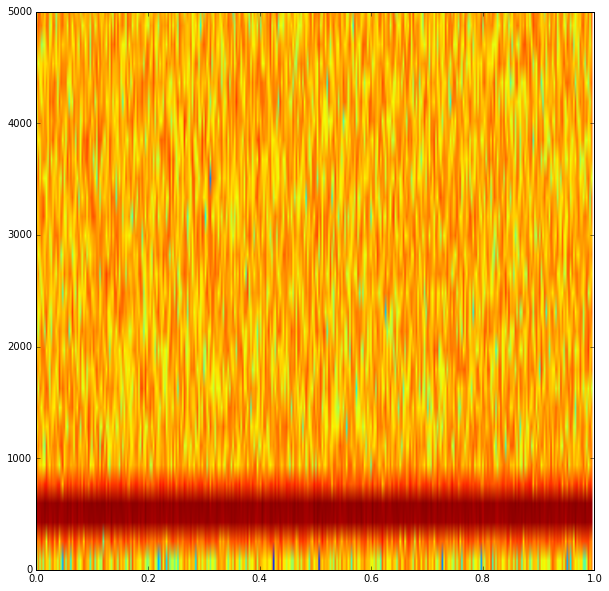

In [15]:
spectrum(la + ruido_blanco)

3. Crear una senoidal simple con frecuencia ascendente y mostrar su espectrograma.

Creemos primero una función que cumpla ésto (que vaya aumentando su frecuencia local)

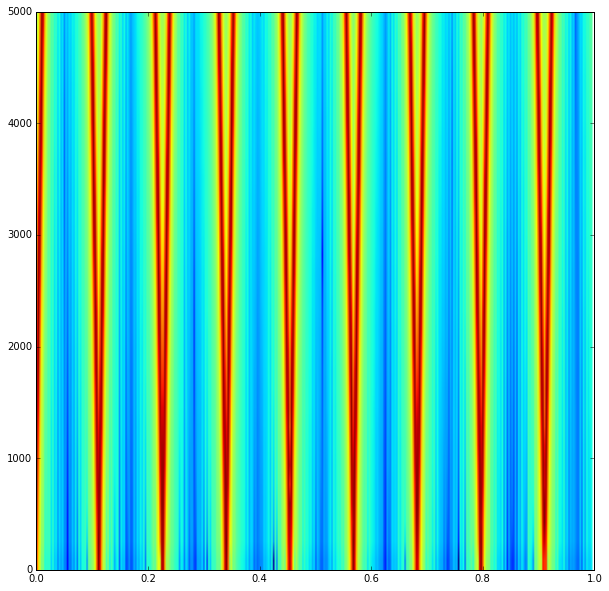

In [16]:
sin_cuad = lambda t: np.sin(2*np.pi*(t**2))

ts = np.arange(44100) / float(44100)

wave = onda(440, fun=sin_cuad, length=1)

#pyplot.plot(ts, wave)
spectrum(wave)

¿Es un artefacto del cálculo esto?

# 4. Combinar dos senoidales con frecuencias 1000 y 100Hz con distintas fases (ej: 0 y pi), y comparar las formas de onda. ¿Tiene algún efecto perceptual el cambio de fase?

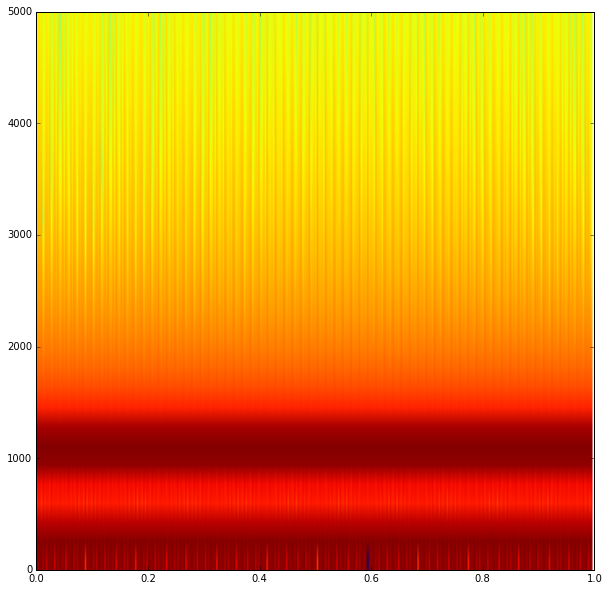

In [22]:
onda1000 = onda(1000, fun=lambda t: mysin(t, phase=np.pi))
onda100 = onda(100)

reproducir(onda1000 + onda100)
spectrum(onda1000 + onda100)

Yo no veo nada...

#
# 5. Crear dos senoidales simples con la misma frecuencia pero distintas fases, de modo que al combinarlas se anulen.

http://en.wikipedia.org/wiki/Active_noise_contro

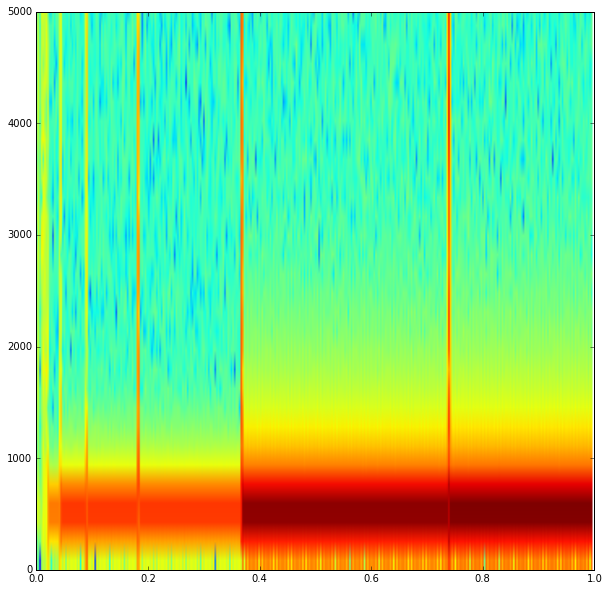

In [34]:
mysin2 = lambda t: mysin(t, phase=np.pi)

spectrum(onda(440, fun=mysin) + onda(440, fun=mysin2))